# Stock Downside Risk Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2020-01-01' #input
end = '2023-01-01' #input
symbol = 'LT.NS' #input

In [3]:
stocks = yf.download(symbol, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [4]:
stocks_returns = stocks.pct_change().dropna()

In [5]:
def downside_risk(stock_returns):
    dr = stock_returns[stock_returns < stock_returns.mean()].std(skipna = True) * np.sqrt(252)
    return dr

Text(0, 0.5, 'Downside Risk')

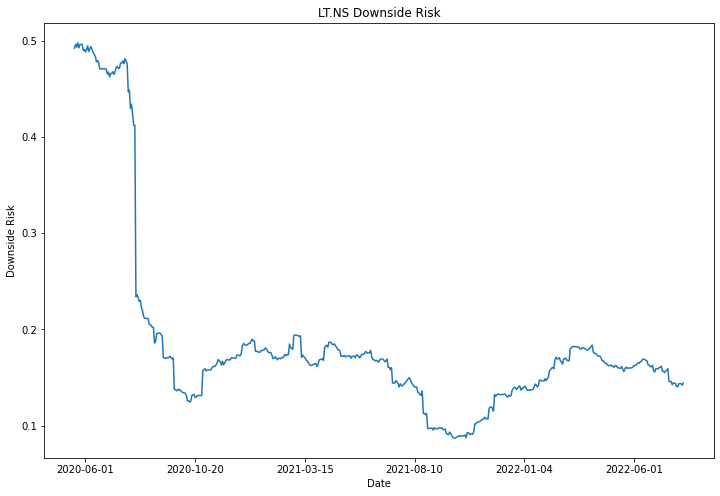

In [6]:
# Compute the running Downside Risk
running = [downside_risk(stocks_returns[i-90:i]) for i in range(90, len(stocks_returns))]

# Plot running Downside Risk up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(stocks_returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([stocks.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol + ' Downside Risk')
plt.xlabel('Date')
plt.ylabel('Downside Risk')

In [7]:
stock_dr = downside_risk(stocks_returns)
stock_dr

0.2308389130401371

In [8]:
running = [downside_risk(stocks_returns[i-90:i]) for i in range(90, len(stocks_returns))]
running

[0.49228782167339513,
 0.4961685982665601,
 0.4933003850959473,
 0.4979372967978082,
 0.49255971818196514,
 0.49612643202599194,
 0.49612643202599194,
 0.49612643202599194,
 0.48989893826165287,
 0.4908381733452714,
 0.4883894866954517,
 0.49048614730274803,
 0.49473157157452546,
 0.4887210913556286,
 0.4912568831396339,
 0.49395458813949883,
 0.49065807611275003,
 0.48771043067547004,
 0.48578315669706656,
 0.4836850251253963,
 0.47802775090119065,
 0.47935086130821863,
 0.4773228055430243,
 0.4707191141648645,
 0.4707191141648645,
 0.4707191141648645,
 0.4707191141648645,
 0.4709943668619984,
 0.4705378866721592,
 0.4705378866721592,
 0.46528093072845866,
 0.4672274898942274,
 0.4622914044565171,
 0.4659614119260963,
 0.4659614119260963,
 0.4677376970485108,
 0.4648522738390266,
 0.46793737305887895,
 0.47220795064666093,
 0.47338532242642795,
 0.47117717236599366,
 0.4714488747741163,
 0.47677458524485533,
 0.47677458524485533,
 0.4790209931819554,
 0.4761049634208072,
 0.4814147463